# 8-queens


In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

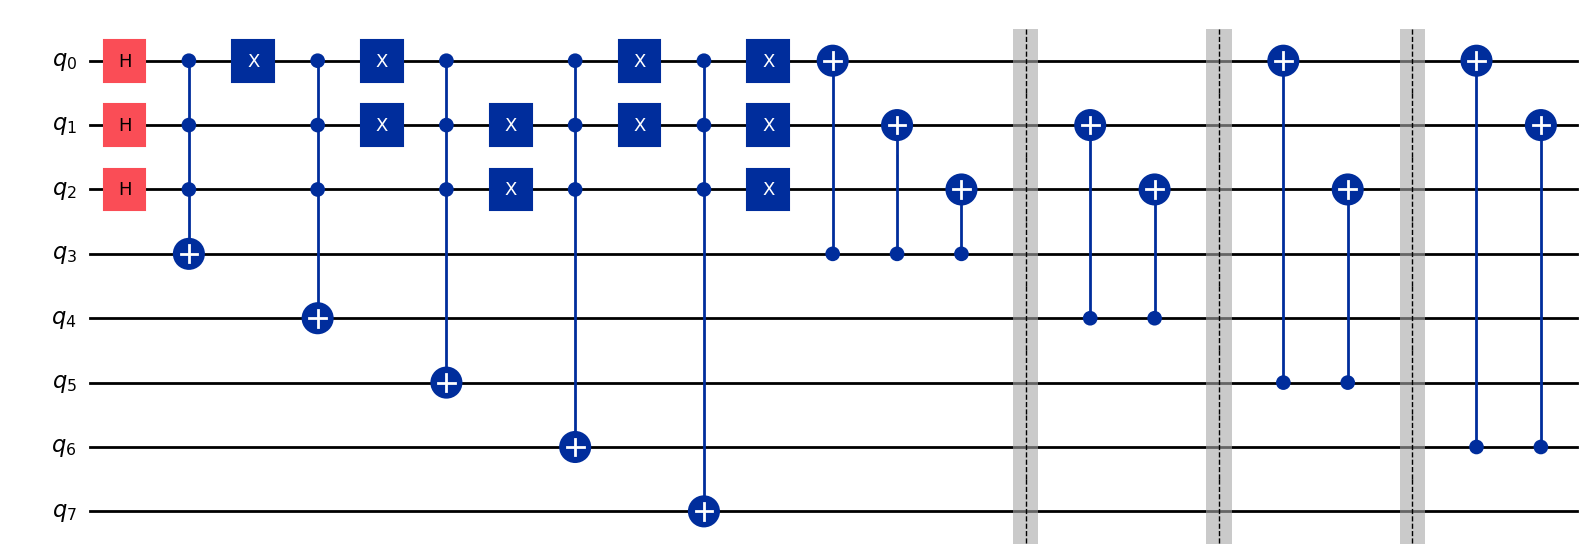

In [2]:
rc = QuantumCircuit(8)

# having 3 bits in superposition, 
# cause we need 2pow3 vectors to represent 
# all possible valid row position of queen
rc.h(0)
rc.h(1)
rc.h(2)

hbits = [0, 1, 2]
rc.mcx(hbits, 3)

rc.x(0)

rc.mcx(hbits, 4)

rc.x(0)
rc.x(1)

rc.mcx(hbits, 5)

rc.x(1)
rc.x(2)

rc.mcx(hbits, 6)

rc.x(0)
rc.x(1)

rc.mcx(hbits, 7)

rc.x(0)
rc.x(1)
rc.x(2)

rc.cx(3, 0)
rc.cx(3, 1)
rc.cx(3, 2)
rc.barrier()

rc.cx(4, 1)
rc.cx(4, 2)
rc.barrier()

rc.cx(5, 0)
rc.cx(5, 2)
rc.barrier()

rc.cx(6, 0)
rc.cx(6, 1)

rc.draw(output="mpl")

In [3]:
simulator = AerSimulator(method="statevector", device="GPU")

rc.save_statevector()

result = simulator.run(rc).result()
sv = result.get_statevector()
counts = result.get_counts(rc)
for key, value in counts.items():
    print(key, ': ', value)

00000001 :  0.125
00000010 :  0.125
00000100 :  0.125
00001000 :  0.125
00010000 :  0.125
00100000 :  0.125
01000000 :  0.125
10000000 :  0.125
